In [1]:
rainfall = scan('Du_lieu/rain_fall.txt')
rainfall

[1]   0.7  16.1  68.6 170.4 106.1 221.7 357.3 314.7 237.3 119.4  36.5  11.8
[13]  25.6  12.5  59.4  21.6  74.2 241.1  96.8 354.2 345.4  99.7 158.0  31.5
[25]  96.9   4.2  24.7 104.5 249.0  95.1 280.4 534.5 178.5  45.0   9.3   9.0
[37]  70.9  12.3 112.4  19.1 105.4 212.9 449.1 283.2 266.9 259.7  19.4  47.5
[49]  16.6  10.0  34.0  58.8 209.0 188.5 428.1 313.4 229.7  94.4  28.2  84.2

In [2]:
ts.rainfall = ts(rainfall, frequency=12, start=c(2014,1))
ts.rainfall

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,0.7,16.1,68.6,170.4,106.1,221.7,357.3,314.7,237.3,119.4,36.5,11.8
2015,25.6,12.5,59.4,21.6,74.2,241.1,96.8,354.2,345.4,99.7,158.0,31.5
2016,96.9,4.2,24.7,104.5,249.0,95.1,280.4,534.5,178.5,45.0,9.3,9.0
2017,70.9,12.3,112.4,19.1,105.4,212.9,449.1,283.2,266.9,259.7,19.4,47.5
2018,16.6,10.0,34.0,58.8,209.0,188.5,428.1,313.4,229.7,94.4,28.2,84.2


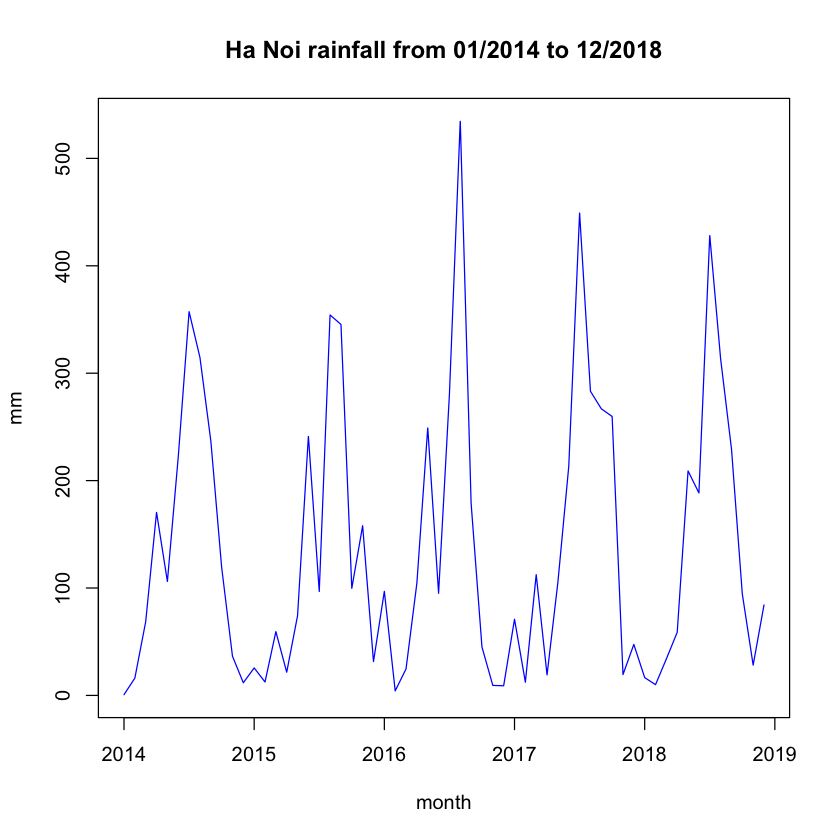

In [3]:
plot.ts(ts.rainfall, main='Ha Noi rainfall from 01/2014 to 12/2018',
       ylab='mm', xlab='month', col='blue')

In [4]:
forecast.rainfall = HoltWinters(ts.rainfall, beta=F, gamma=F)
forecast.rainfall

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = ts.rainfall, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.8286106
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 77.31102

In [5]:
forecast.rainfall$SSE

[1] 881132.7

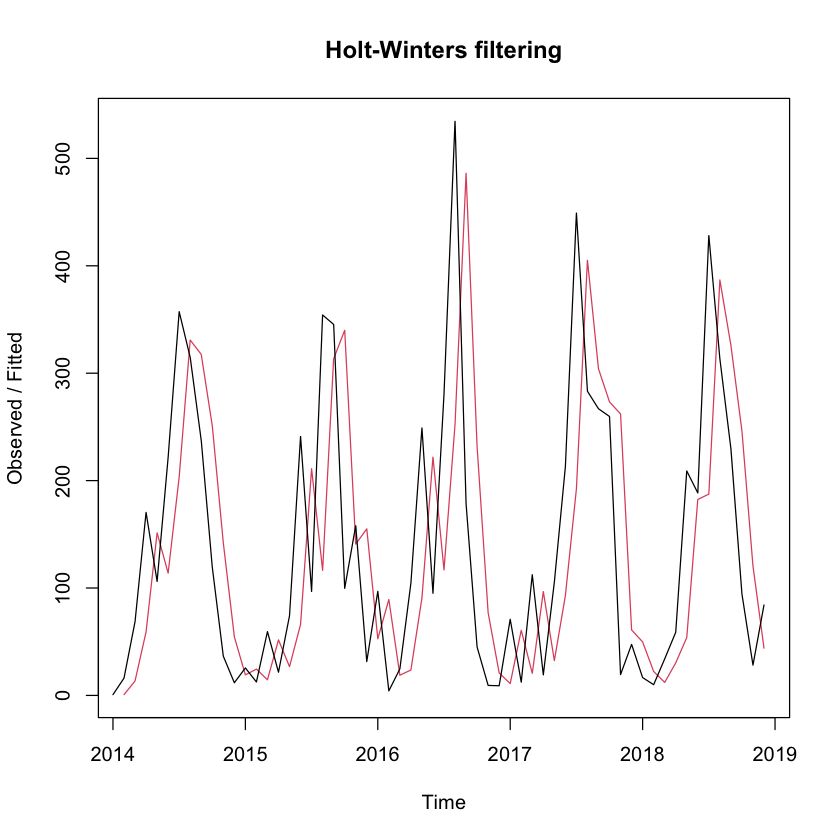

In [6]:
plot(forecast.rainfall)

In [7]:
HWES.forecast = HoltWinters(log(ts.rainfall))
HWES.forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(ts.rainfall))

Smoothing parameters:
 alpha: 0.008543883
 beta : 1
 gamma: 0.09435026

Coefficients:
           [,1]
a    4.47766468
b    0.02414736
s1  -0.77223112
s2  -1.71165645
s3  -0.12523136
s4  -0.87068073
s5   0.34080168
s6   1.12211650
s7   1.54813501
s8   1.43928012
s9   1.13742642
s10  0.45545767
s11 -0.70032052
s12 -1.39168999

In [8]:
HWES.forecast$SSE

[1] 28.13103

In [9]:
mse = HWES.forecast$SSE / length(ts.rainfall)
mse

[1] 0.4688505

In [10]:
rmse = sqrt(mse)
rmse

[1] 0.6847266

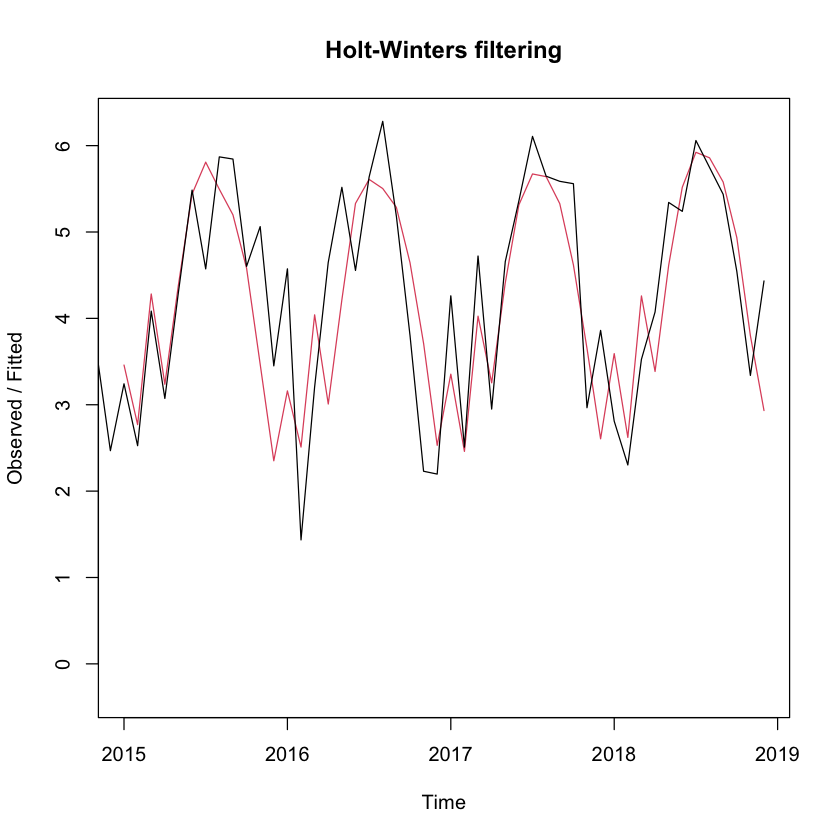

In [11]:
plot(HWES.forecast)

In [ ]:
install.packages('forecast')

In [12]:
library('forecast')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [15]:
HWES.forecast.new = forecast:::forecast.HoltWinters(HWES.forecast, h=5)

In [16]:
HWES.forecast.new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       3.729581 2.747478 4.711684 2.227584 5.231578
Feb 2019       2.814303 1.832057 3.796549 1.312087 4.316519
Mar 2019       4.424875 3.442306 5.407444 2.922166 5.927585
Apr 2019       3.703573 2.720431 4.686715 2.199987 5.207159
May 2019       4.939203 3.955166 5.923240 3.434249 6.444158